In [1]:
# google vision import
import os
import sys
from google.auth.transport.requests import Request, AuthorizedSession
from google.cloud.vision import ImageAnnotatorClient, types
from google.oauth2 import id_token, credentials, service_account
import pandas

credent = service_account.Credentials.from_service_account_file(
    'anster-1593361678608.json')

def localize_objects(path):
    """Localize objects in the local image.

    Args:
    path: The path to the local file.
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient(credentials=credent)

    with open(path, 'rb') as image_file:
        content = image_file.read()
    image = vision.types.Image(content=content)

    objects = client.object_localization(
        image=image).localized_object_annotations      
    print(objects)
    return objects

In [2]:
#顏色處理
import webcolors
import matplotlib.colors as mc
from owlready2 import *

onto_color = get_ontology("file://C:/Users/v-wenklu/OneDrive - Microsoft/Desktop/bobo/Project/aster/preprocessing/ObjectDetection/color_onto.owl").load()

color_dict = {"aliceblue" : "愛麗絲藍色",
"antiquewhite" : "古董白色",
"aqua" : "水色",
"aquamarine" : "藍晶色",
"azure" : "天藍色",
"beige" : "米色",
"bisque" : "濃湯色",
"black" : "黑色",
"blanchedalmond" : "布蘭查德蒙德色",
"blue" : "藍色",
"blueviolet" : "紫羅蘭色",
"brown" : "棕色",
"burlywood" : "burlywood色",
"cadetblue" : "cadetblue色",
"chartreuse" : "黃綠色",
"chocolate" : "巧克力色",
"coral" : "珊瑚色",
"cornflowerblue" : "矢車菊藍色",
"cornsilk" : "玉米絲色",
"crimson" : "赤紅色",
"cyan" : "青色",
"darkblue" : "深藍色",
"darkcyan" : "塔卡卡揚色",
"darkgoldenrod" : "暗金桿色",
"darkgray" : "深灰色",
"darkgrey" : "深灰色",
"darkgreen" : "深綠色",
"darkkhaki" : "達基色",
"darkmagenta" : "深洋紅色",
"darkolivegreen" : "深橄欖綠色",
"darkorange" : "深橙色",
"darkorchid" : "蘭花色",
"darkred" : "深紅色",
"darksalmon" : "黑鮭色",
"darkseagreen" : "深海綠色",
"darkslateblue" : "深藍色",
"darkslategray" : "黑暗崩解色",
"darkslategrey" : "暗灰色",
"darkturquoise" : "深藍綠色",
"darkviolet" : "暗紫色",
"deeppink" : "深粉紅色",
"deepskyblue" : "深藍色",
"dimgray" : "定萊色",
"dimgrey" : "丁格里色",
"dodgerblue" : "道奇藍色",
"firebrick" : "耐火磚色",
"floralwhite" : "花白色",
"forestgreen" : "森林綠色",
"fuchsia" : "紫紅色",
"gainsboro" : "恩斯伯勒色",
"ghostwhite" : "幽靈般的白色",
"gold" : "金色",
"goldenrod" : "金毛色",
"gray" : "灰色",
"grey" : "灰色",
"green" : "綠色",
"greenyellow" : "黃綠色",
"honeydew" : "甘露色",
"hotpink" : "亮粉色",
"indianred" : "印第安人色",
"indigo" : "靛青色",
"ivory" : "象牙色",
"khaki" : "黃褐色",
"lavender" : "薰衣草色",
"lavenderblush" : "薰衣草腮紅色",
"lawngreen" : "草坪綠色",
"lemonchiffon" : "檸檬雪紡色",
"lightblue" : "淺藍色",
"lightcoral" : "輕珊瑚色",
"lightcyan" : "淺藍色",
"lightgoldenrodyellow" : "淺金黃色",
"lightgray" : "淺灰色",
"lightgrey" : "淺灰色",
"lightgreen" : "淺綠色",
"lightpink" : "淺粉紅色",
"lightsalmon" : "Lightsalmon色",
"lightseagreen" : "淺海綠色",
"lightskyblue" : "天藍色",
"lightslategray" : "光一體化色",
"lightslategrey" : "淺灰色",
"lightsteelblue" : "淺藍色",
"lightyellow" : "淺黃色",
"lime" : "酸橙色",
"limegreen" : "檸檬綠色",
"linen" : "麻布色",
"magenta" : "品紅色",
"maroon" : "栗色",
"mediumaquamarine" : "海藍寶石色",
"mediumblue" : "中藍色",
"mediumorchid" : "蘭花色",
"mediumpurple" : "中紫色",
"mediumseagreen" : "中海綠色",
"mediumslateblue" : "深藍色",
"mediumspringgreen" : "中春綠色",
"mediumturquoise" : "綠松石色",
"mediumvioletred" : "中紫色",
"midnightblue" : "午夜藍色",
"mintcream" : "薄荷色",
"mistyrose" : "迷霧玫瑰色",
"moccasin" : "莫卡辛色",
"navajowhite" : "納瓦霍懷特色",
"navy" : "海軍色",
"oldlace" : "老花邊色",
"olive" : "橄欖色",
"olivedrab" : "Olivedrab色",
"orange" : "橙子色",
"orangered" : "橙紅色",
"orchid" : "蘭花色",
"palegoldenrod" : "淡金黃色的色",
"palegreen" : "淡綠色",
"paleturquoise" : "淺綠色",
"palevioletred" : "泛紫色",
"papayawhip" : "木瓜鞭色",
"peachpuff" : "桃撲色",
"peru" : "秘魯色",
"pink" : "粉色",
"plum" : "李子色",
"powderblue" : "粉藍色",
"purple" : "紫色",
"red" : "紅色",
"rosybrown" : "紅褐色",
"royalblue" : "寶藍色",
"saddlebrown" : "馬鞍棕色",
"salmon" : "三文魚色",
"sandybrown" : "沙棕色",
"seagreen" : "海綠色",
"seashell" : "貝殼色",
"sienna" : "赭色",
"silver" : "銀色",
"skyblue" : "天藍色",
"slateblue" : "slateblue色",
"slategray" : "滑脫色",
"slategrey" : "板岩灰色",
"snow" : "雪色",
"springgreen" : "春綠色",
"steelblue" : "鋼藍色",
"tan" : "談色",
"teal" : "藍綠色",
"thistle" : "薊色",
"tomato" : "番茄色",
"turquoise" : "綠松石色",
"violet" : "紫色",
"wheat" : "小麥色",
"white" : "白色",
"whitesmoke" : "白色的煙色",
"yellow" : "黃色",
"yellowgreen" : "黃綠色",
"darkbrown" : "深棕色",
"caramel" : "焦糖色",
"coffee" : "咖啡色",
"darkcoffee" : "黑咖啡色"}

def get_common_color_name(color_name):
    try:
        spe = onto_color.SpecificColor(color_name)
        com_color = spe.specific_in_common[0].name
        return com_color
    except Exception as e:
        return ""

def translate_color(color_name_en):
    try:
        color_name_ch = color_dict[color_name_en]
    except:
        translator = Translator()
        color_name_ch = translator.translate(color_name, dest="zh-tw").text
        print(f"warning: translate_color() can't find name in color_dict, using google translate. color_name_ch:{color_name_ch}")
    return color_name_ch

def color_predefine():
    CSS3 = webcolors.CSS3_NAMES_TO_HEX
    CSS3_r = {}
    CSS3['brown'] = '#8B4513'
    CSS3['darkbrown'] = '#654321'
    CSS3['caramel'] = '#65350F'
    CSS3['coffee'] = '#6F4137'
    CSS3['darkcoffee'] = '#3B2F2F'
    
    for k, v in CSS3.items():
        CSS3_r[v] = k
    return CSS3, CSS3_r

CSS3, CSS3_r = color_predefine()


def closest_color(requested_color):
    min_colors = {}
    
    #計算最相近的顏色
    try:
        rgb = webcolors.hex_to_rgb(requested_color)
        for key, value in CSS3.items():
            r_c, g_c, b_c = webcolors.hex_to_rgb(value)
            rd = (r_c - rgb[0]) ** 2
            gd = (g_c - rgb[1]) ** 2
            bd = (b_c - rgb[2]) ** 2
            min_colors[(rd + gd + bd)] = value
        nearest_color = min_colors[min(min_colors.keys())]
        name = CSS3_r[nearest_color]
        return name
    except Exception as e:
        print(f'Error: closest_color went wrong, exception {e}')
        return None
        
def get_color_name(requested_color, method:str = 'hex'):
    try:
    
        if method == 'hex' and str(requested_color[0]) == '#':            
            closest_name = actual_name = CSS3_r[requested_color]
        else:
            closest_name = actual_name = webcolors.rgb_to_name(requested_color)
    #如果沒有相近顏色 跳except
    except ValueError:
        closest_name = closest_color(requested_color)
        actual_name = None
    except Exception as e:
        closest_name = closest_color(requested_color)
        actual_name = None
        
    if actual_name == None:
        return closest_name
#     return actual_name, closest_name

* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [3]:
# 顏色偵測
from __future__ import print_function
import binascii
import struct
from PIL import Image
import numpy as np
import scipy
import scipy.misc
import scipy.cluster 
import matplotlib.pyplot as plt
from googletrans import Translator

def crop_image(file_name, location):
    
    img = Image.open(file_name)
    
    #取得照片長寬
    width, height = img.size
    
    
    #得出物件上下左右
    left = location[0] * width
    top = location[1] * height
    right = location[2] * width 
    bottom = location[3] * height
    
    #裁切
    crop_img = img.crop((left, top, right, bottom)) 
    
    return crop_img
    
def find_dominate_color(file_name, location, resize, resize_ratio, resize_threshold, color_nums, show_img, show_size):
    NUM_CLUSTERS = color_nums
    color_name_array = []
    
    # 照片前處理
    try: 
        im = crop_image(file_name, location) #切圖片
        
        if show_img:
            print('crop_img:', location)
            plt.figure()
            plt.imshow(im) ## for testing
        
        width, height = im.size
        if show_size:
            print(f'width: {width}, height: {height}')
        
        if resize or width > resize_threshold or height > resize_threshold:
            resize_width = int(width * resize_ratio)
            resize_height = int(height * resize_ratio)
            print(f'start image resize to {resize_width}, {resize_height}')
            
            im = im.resize((resize_width, resize_height))      #壓縮圖片 減少時間 如果resize = true
            
        ar = np.asarray(im)
        shape = ar.shape
        ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)
    except Exception as e:
        print(f'Error: find_dominate_color preprocessing went wrong, exception:{e}')
        return []
    
    # 計算顏色
    try:
        codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
        vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
        counts, bins = np.histogram(vecs, len(codes))    # count occurrences

        index_max = np.argmax(counts)                    # find most frequent
        peak = codes[index_max]
        colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
    except Exception as e:
        print(f'Error: find_dominate_color clustering went wrong, exception:{e}')
              
    # 顏色編碼
    for i in codes:
        hex_code = '#'+binascii.hexlify(bytearray(int(c) for c in i)).decode('ascii')
        
        #轉成英文
        color_name = get_color_name(hex_code)
        color_name_array.append(color_name)
        
        #轉成中文
        color_name_ch = translate_color(color_name)       
        color_name_array.append(color_name_ch)
        
        #轉換常見顏色
        color_name_common = get_common_color_name(color_name_ch)
        if color_name_common == "": #例外處理
            continue
        color_name_array.append(color_name_common)
        
    unique_color_name = set(color_name_array) #去掉重複的值
    return unique_color_name

In [4]:
def location_preprocess(objects):
    object_array = [] 
    obj_count = len(objects) #計算有幾個object
    for object_ in objects:
        object_dict = {}
        
        #取得物件和可信度
        name = object_.name
        score = object_.score
        
        #取得座標
        location = object_.bounding_poly.normalized_vertices
        location_array = [location[0].x, location[0].y , location[2].x, location[2].y]
        
        
        #回傳值處理
        object_dict['name'] = name
        object_dict['score'] = score
        object_dict['location'] = location_array
        
        object_array.append(object_dict)
    
    return object_array


def color_detection(objects, file_name, resize=False, resize_ratio=0.8, resize_threshold=10000, color_nums=5, show_img=False, show_size=False):
    #把物件、可信度、物件位置抓出來
    color_name_array = []
    try:
        object_array = location_preprocess(objects)
        #針對每個物件增加顏色array
        for object_ in object_array: #遍歷照片中的每個物件
            color_name = find_dominate_color(file_name, object_['location'], resize, resize_ratio, resize_threshold, color_nums, show_img, show_size) #取得顏色號碼陣列
            color_name_array.append(color_name)
        return color_name_array
    except Exception as e:
        print(f'Error: color_detection went wrong, Exception:{e}')
        return []

In [5]:
hex_code_array

NameError: name 'hex_code_array' is not defined

[mid: "/m/07mhn"
name: "Pants"
score: 0.9622306823730469
bounding_poly {
  normalized_vertices {
    x: 0.35649558901786804
    y: 0.4512944221496582
  }
  normalized_vertices {
    x: 0.5985859036445618
    y: 0.4512944221496582
  }
  normalized_vertices {
    x: 0.5985859036445618
    y: 0.9061022400856018
  }
  normalized_vertices {
    x: 0.35649558901786804
    y: 0.9061022400856018
  }
}
, mid: "/m/047vlmn"
name: "Outerwear"
score: 0.9289688467979431
bounding_poly {
  normalized_vertices {
    x: 0.28234556317329407
    y: 0.16609878838062286
  }
  normalized_vertices {
    x: 0.6613409519195557
    y: 0.16609878838062286
  }
  normalized_vertices {
    x: 0.6613409519195557
    y: 0.5263592004776001
  }
  normalized_vertices {
    x: 0.28234556317329407
    y: 0.5263592004776001
  }
}
, mid: "/m/01g317"
name: "Person"
score: 0.9164541959762573
bounding_poly {
  normalized_vertices {
    x: 0.27640166878700256
    y: 0.05019020661711693
  }
  normalized_vertices {
    x: 0.671049

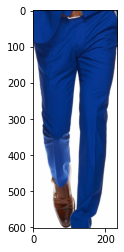

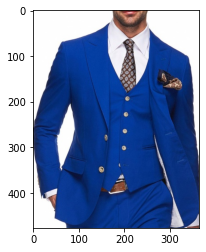

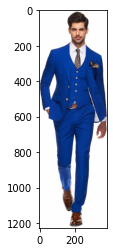

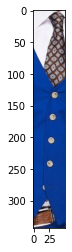

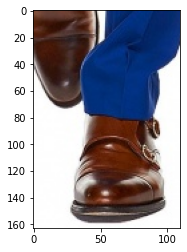

In [12]:
file_name = 'blue_suit2.jpg'

objects = localize_objects(file_name) #bob的function

print(objects)
color_array = color_detection(objects, file_name, resize=False, resize_ratio=0.8, resize_threshold=10000, color_nums=2, show_img=True)

In [8]:
color_array

[{'darkbrown',
  'midnightblue',
  'slategrey',
  'white',
  '午夜藍色',
  '咖啡色',
  '板岩灰色',
  '深棕色',
  '白色',
  '藍色'},
 {'dimgrey',
  'midnightblue',
  'silver',
  'snow',
  '丁格里色',
  '午夜藍色',
  '灰色',
  '粉紅色',
  '藍色',
  '銀色',
  '雪色'},
 {'darkbrown',
  'midnightblue',
  'rosybrown',
  'white',
  '午夜藍色',
  '咖啡色',
  '深棕色',
  '白色',
  '紅色',
  '紅褐色',
  '藍色'},
 {'darkcoffee',
  'darkgrey',
  'dimgrey',
  'midnightblue',
  'whitesmoke',
  '丁格里色',
  '午夜藍色',
  '咖啡色',
  '深灰色',
  '灰色',
  '白色的煙色',
  '藍色',
  '黑咖啡色'},
 {'coffee',
  'darkcoffee',
  'darkgrey',
  'midnightblue',
  'snow',
  '午夜藍色',
  '咖啡色',
  '深灰色',
  '灰色',
  '粉紅色',
  '藍色',
  '雪色',
  '黑咖啡色'}]